Matriz de Covariância:
[[ 0.17599681 -0.01089153  0.32707828  0.13251109]
 [-0.01089153  0.04876198 -0.08461283 -0.03122115]
 [ 0.32707828 -0.08461283  0.7998544   0.3325438 ]
 [ 0.13251109 -0.03122115  0.3325438   0.14912676]]

Autovalores:
[1.08526193 0.06228625 0.02007402 0.00611775]

Autovetores:
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]

Dois maiores autovalores:
(1.0852619299728725, 0.06228625101282653)

Dois maiores autovetores:
(array([ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ]), array([-0.65658877, -0.73016143,  0.17337266,  0.07548102]))


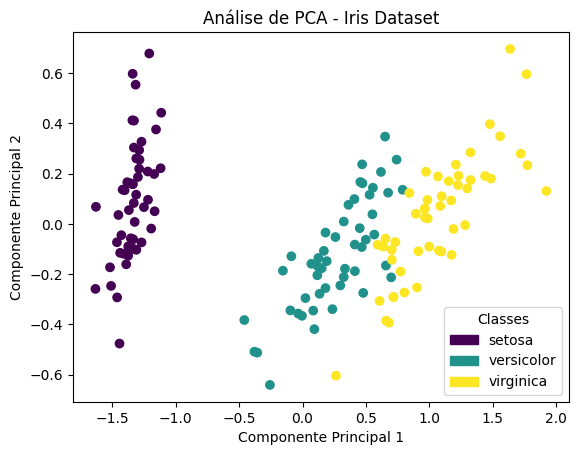

In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from matplotlib.patches import Patch

iris = load_iris()

data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target_names[iris.target]

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X = (X - np.mean(X)) / np.std(X)

cov_matrix = np.cov(X.T)
print("Matriz de Covariância:")
print(cov_matrix)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nAutovalores:")
print(eigenvalues)
print("\nAutovetores:")
print(eigenvectors)

eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

top_eigenvalues = eigen_pairs[0][0], eigen_pairs[1][0]
top_eigenvectors = eigen_pairs[0][1], eigen_pairs[1][1]

print("\nDois maiores autovalores:")
print(top_eigenvalues)
print("\nDois maiores autovetores:")
print(top_eigenvectors)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

label_map = {name: i for i, name in enumerate(iris.target_names)}
y_numeric = np.array([label_map[label] for label in y])

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='viridis')

legend_labels = iris.target_names
handles = [Patch(color=scatter.cmap(scatter.norm(label_map[label])), label=label) for label in legend_labels]
plt.legend(handles=handles, title="Classes")

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análise de PCA - Iris Dataset')
plt.show()
